In [3]:
# uniform distribution time estimation
# importing libraries
import random
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [4]:
# simple function to measure time
def time_estimator(lib, k):
    """Time estimator for generators of k numbers made by two libraries: random or numpy"""
    time_points = []  # save multiple points for plot
    for i in range(k):
        time_begin = time.perf_counter()
        for _ in range(0, i):
            if lib == 'random':
                random.random()
            elif lib == 'np':
                np.random.random()
            else:
                raise ValueError("Error: argument 'lib' can be 'random' or 'np'")
        time_end = time.perf_counter()
        time_points.append(time_end - time_begin)
    return time_points

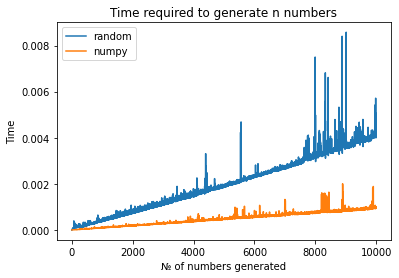

In [8]:
k = 10000
random_total_time = time_estimator('np', k)
np_total_time = time_estimator('random', k)

fig,ax = plt.subplots()
plt.xlabel('№ of numbers generated')
plt.ylabel('Time, s')
plt.title('Time required to generate n numbers')
ax.plot(range(k), random_total_time, label = 'random')
ax.plot(range(k), np_total_time, label = 'numpy')
leg = ax.legend()
plt.show()
# numpy is waaaaay faster

In [17]:
# bogosort code taken from here: https://www.geeksforgeeks.org/python-program-for-bogosort-or-permutation-sort/

def bogosort(lst):
    while not is_sorted(lst):
        random.shuffle(lst)
    return lst

# to check if array is sorted
def is_sorted(a):
    n = len(a)
    for i in range(0, n-1):
        if (a[i] > a[i+1] ):
            return False
    return True

In [49]:
def bs_time_estimator(n):  # calculate mean and SD for list size = [1...n] which is bogosorted
    mean_points = []
    std_points = []
    for i in range(1, n + 1):
        curr_list = list(range(1, i + 1))
        time_points = []
        random.shuffle(curr_list)  # mixing current list
        for _ in range(5):  # counting time for each list, same ideas as for random
            time_begin = time.perf_counter()
            bogosort(curr_list)  # sorting here
            time_end = time.perf_counter()
            time_points.append(time_end - time_begin)
        mean_time = np.mean(time_points)
        mean_points.append(mean_time)
        std_time = np.std(time_points)
        std_points.append(std_time)
    return mean_points, std_points

In [48]:
for i in range(1, n + 1):  # from 1 to n
    curr_list = list(range(1, i + 1))
    print(curr_list)

[1]
[1, 2]
[1, 2, 3]
[1, 2, 3, 4]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
n = 100
mean_points, std_points = bs_time_estimator(n)

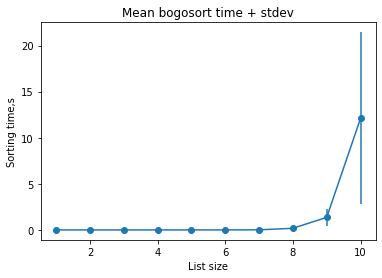

In [51]:
fig,ax = plt.subplots()
plt.xlabel('List size')
plt.ylabel('Sorting time,s')
plt.title('Mean bogosort time + stdev')
ax.errorbar(range(1, n + 1), mean_points, yerr=std_points, fmt='-o')
plt.show()